In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def plot_training_losses(data, loss="MAE", range=np.arange(0,0.7, 0.05)):
    plt.plot(data, marker='.', linestyle='-')
    plt.yticks(range)
    plt.xlabel('Epoch')
    plt.ylabel(loss)
    plt.grid(True)
    plt.show()

def make_netmat(data, netmat_dim=100):

    # actually, this all testing so just need one such netmat I think. Since schf100 then one sub is (100*(100-1))/2 = 4950
    sing_sub = int((netmat_dim * (netmat_dim-1))/2)

    # get indeces of upptri cause all these vec netmats are upper trinagles. 
    out_mat_init = np.ones(2*sing_sub+netmat_dim).reshape(netmat_dim,netmat_dim)

    inds_uptri = np.triu_indices_from(out_mat_init,k=1) # k=1 means no diagonal?
    inds_lowtri = np.tril_indices_from(out_mat_init,k=-1) # k=1 means no diagonal?
    # print(len(inds_uptri), len(inds_uptri[0]), len(inds_uptri[1])) # make sure its same value as sing_sub above=n(n-1)/2
    # print(len(inds_lowtri), len(inds_lowtri[0]),len(inds_lowtri[1])) # make sure its same value as sing_sub above=n(n-1)/2
    out_mat_val = out_mat_init
    # out_mat_val[inds_uptri] = data
    out_mat_val[inds_lowtri] = data
    # Populate the upper triangle by transposing the lower triangle values
    out_mat_init[inds_uptri] = out_mat_init.T[inds_uptri]

    return out_mat_init

def show_netmats(data1, data2, netmat_dim=100):
    img1 = make_netmat(data1)
    img2 = make_netmat(data2)

    fig, axes = plt.subplots(1, 2, figsize=(11, 5))

    axes[0].imshow(img1, vmin=-1, vmax=1)
    axes[0].set_title('Ground Truth')
    axes[0].axis("off")

    plot2=axes[1].imshow(img2, vmin=-1, vmax=1)
    axes[1].set_title('Sequentially Generated')
    axes[1].axis("off")

    fig.colorbar(plot2)
    plt.tight_layout()

def show_subj_hemi(ground_truth_mat, pred_mat, subj_idx):
    ground_truth = ground_truth_mat[subj_idx, :]
    pred = pred_mat[subj_idx, :]
    print(f"Correlation: {np.corrcoef(ground_truth, pred)[0,1]}")
    show_netmats(ground_truth, pred)

# Large Conv Model

Model parameters: 296,906,552


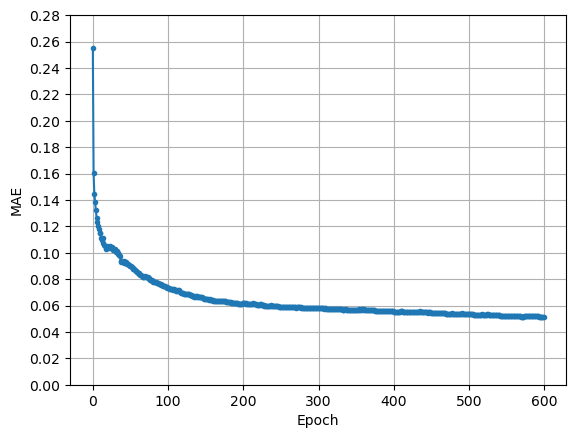

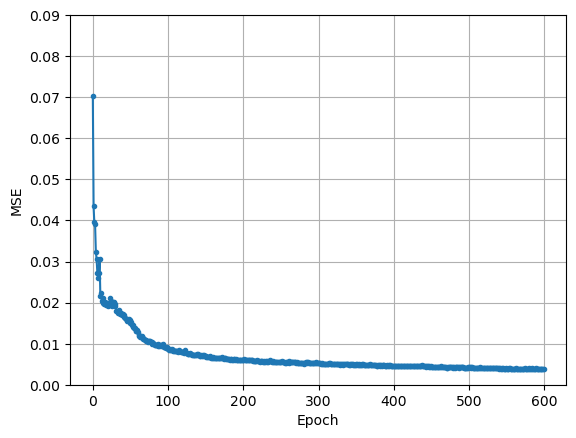

In [3]:
# Training curve
MAEs = [
    0.25512427,
    0.1606202,
    0.14450374,
    0.13869515,
    0.13203229,
    0.12640399,
    0.12349166,
    0.12047569,
    0.11778469,
    0.11501496,
    0.11509412,
    0.111414626,
    0.109837085,
    0.111411236,
    0.10711446,
    0.105683774,
    0.104732215,
    0.103025876,
    0.10450546,
    0.10489906,
    0.10330462,
    0.10358728,
    0.10463703,
    0.10474844,
    0.103374936,
    0.103642486,
    0.104514204,
    0.10172211,
    0.10185352,
    0.10201275,
    0.103030026,
    0.10071227,
    0.100984536,
    0.0995976,
    0.09868747,
    0.09852387,
    0.09777317,
    0.094051905,
    0.09332537,
    0.09339024,
    0.0929245,
    0.09335946,
    0.09252883,
    0.0930125,
    0.09264994,
    0.09159231,
    0.09145357,
    0.091289274,
    0.091000825,
    0.09022523,
    0.08980741,
    0.08963084,
    0.088974245,
    0.088568605,
    0.087955676,
    0.0876395,
    0.08684873,
    0.08630383,
    0.08594736,
    0.08527618,
    0.08456125,
    0.08433016,
    0.083790936,
    0.08340396,
    0.083123915,
    0.08253082,
    0.081920624,
    0.08183568,
    0.081875235,
    0.081989996,
    0.08173635,
    0.08130332,
    0.08136134,
    0.08124654,
    0.08109814,
    0.08009048,
    0.07970539,
    0.07931643,
    0.07911157,
    0.07866355,
    0.07791242,
    0.07775389,
    0.07779588,
    0.07787243,
    0.077747054,
    0.07707926,
    0.076991715,
    0.076893345,
    0.07620963,
    0.076199055,
    0.07609554,
    0.07584686,
    0.07533554,
    0.07490016,
    0.07474618,
    0.07476898,
    0.07489269,
    0.07438439,
    0.07377471,
    0.07352624,
    0.073161,
    0.07295079,
    0.07255319,
    0.07232109,
    0.07235826,
    0.07231647,
    0.07220941,
    0.0718643,
    0.07217257,
    0.07170293,
    0.07165598,
    0.07123512,
    0.07127712,
    0.071859136,
    0.07139207,
    0.070823014,
    0.070042774,
    0.06967569,
    0.06942782,
    0.06920814,
    0.069261566,
    0.068911806,
    0.0687348,
    0.06851582,
    0.06890764,
    0.06875685,
    0.068580404,
    0.068588905,
    0.06842374,
    0.068253785,
    0.06797602,
    0.06759622,
    0.06717688,
    0.067010075,
    0.06709199,
    0.06681195,
    0.06660427,
    0.06684286,
    0.06697735,
    0.06665705,
    0.06643289,
    0.06631755,
    0.06657594,
    0.06655905,
    0.06631659,
    0.06618469,
    0.06561975,
    0.065484755,
    0.06524159,
    0.06485514,
    0.06481421,
    0.064788334,
    0.0647643,
    0.06483107,
    0.06453415,
    0.06485384,
    0.06443973,
    0.063965365,
    0.06395449,
    0.06380941,
    0.06359956,
    0.06341249,
    0.06327851,
    0.06321403,
    0.06327097,
    0.06344002,
    0.06329085,
    0.06343797,
    0.063419014,
    0.06358925,
    0.0637257,
    0.06375643,
    0.06360485,
    0.06332612,
    0.063406035,
    0.06336821,
    0.06317404,
    0.06297938,
    0.063008346,
    0.062981136,
    0.0626196,
    0.06231968,
    0.06255106,
    0.06252871,
    0.06227712,
    0.062038854,
    0.061920334,
    0.061680105,
    0.061695945,
    0.06176918,
    0.06170366,
    0.06159635,
    0.061653983,
    0.061465126,
    0.061408866,
    0.06138542,
    0.061396867,
    0.061317496,
    0.06137497,
    0.061565097,
    0.06155866,
    0.061720505,
    0.06161834,
    0.06154453,
    0.06119675,
    0.060944233,
    0.061091766,
    0.061217565,
    0.06124438,
    0.061443,
    0.06118072,
    0.06131408,
    0.061408117,
    0.06155331,
    0.061192255,
    0.060934555,
    0.06117105,
    0.060826354,
    0.06053286,
    0.06040746,
    0.060515843,
    0.06051446,
    0.06083502,
    0.060980737,
    0.060589142,
    0.060138963,
    0.060100563,
    0.059987493,
    0.060031205,
    0.059941184,
    0.059856538,
    0.059923973,
    0.0597317,
    0.05968323,
    0.059747748,
    0.059744157,
    0.0598986,
    0.060060035,
    0.05991033,
    0.059830967,
    0.059609152,
    0.059410598,
    0.059386272,
    0.059442725,
    0.059447013,
    0.05947756,
    0.059329726,
    0.059093017,
    0.05900513,
    0.059140146,
    0.05915356,
    0.059250794,
    0.059186693,
    0.059078965,
    0.05889734,
    0.058938716,
    0.05874983,
    0.05863492,
    0.058640286,
    0.058766685,
    0.05874382,
    0.0586647,
    0.058548488,
    0.0586408,
    0.05867488,
    0.058704875,
    0.05889394,
    0.058760047,
    0.058712106,
    0.058575053,
    0.058454085,
    0.058508694,
    0.058597863,
    0.058544584,
    0.058541697,
    0.058672085,
    0.05850868,
    0.058347274,
    0.05831326,
    0.05830068,
    0.058067407,
    0.05800965,
    0.058194425,
    0.05805544,
    0.058040068,
    0.058234308,
    0.058235604,
    0.058163323,
    0.058273952,
    0.05816892,
    0.058296595,
    0.05815355,
    0.058033742,
    0.057998076,
    0.057999298,
    0.05811133,
    0.058130253,
    0.05812929,
    0.058267526,
    0.0583308,
    0.05839659,
    0.05825011,
    0.058216225,
    0.058352247,
    0.05829203,
    0.058295775,
    0.05805796,
    0.05773686,
    0.057827074,
    0.057822093,
    0.057630554,
    0.05754501,
    0.057547223,
    0.0576035,
    0.05740576,
    0.057259575,
    0.05731084,
    0.057192694,
    0.05710092,
    0.05723013,
    0.05724441,
    0.057296395,
    0.057193115,
    0.057190083,
    0.05720248,
    0.05746054,
    0.057450436,
    0.057370584,
    0.057182938,
    0.057190556,
    0.05713245,
    0.05705878,
    0.056980595,
    0.056866325,
    0.056980073,
    0.057074167,
    0.05716761,
    0.05693808,
    0.05682116,
    0.05674016,
    0.05676007,
    0.056820225,
    0.056787122,
    0.05670321,
    0.056797143,
    0.05679605,
    0.05657664,
    0.056536585,
    0.056694992,
    0.056573976,
    0.056585055,
    0.056700684,
    0.056893002,
    0.056990214,
    0.05653028,
    0.056492683,
    0.056743458,
    0.057101652,
    0.05707559,
    0.056948204,
    0.056990407,
    0.05695372,
    0.056764554,
    0.05679518,
    0.056804653,
    0.0567523,
    0.05664533,
    0.056648143,
    0.056609526,
    0.056593392,
    0.05647396,
    0.05629913,
    0.056549225,
    0.05644171,
    0.056264088,
    0.055929232,
    0.055915046,
    0.05596294,
    0.05582306,
    0.055854034,
    0.055807874,
    0.055911176,
    0.055839792,
    0.055692192,
    0.055989087,
    0.05599914,
    0.05573605,
    0.055644397,
    0.055695184,
    0.055717085,
    0.055703923,
    0.05562563,
    0.055597033,
    0.055707857,
    0.05562656,
    0.055563834,
    0.055689994,
    0.055661406,
    0.05552026,
    0.055533558,
    0.055469867,
    0.055370606,
    0.055375103,
    0.055320863,
    0.055299483,
    0.055279274,
    0.05530941,
    0.055369634,
    0.05539674,
    0.0555262,
    0.05548833,
    0.055491503,
    0.05534251,
    0.05520378,
    0.055152584,
    0.055130687,
    0.05519885,
    0.055141892,
    0.05518251,
    0.05537449,
    0.055384353,
    0.0551381,
    0.05526989,
    0.05514749,
    0.05497964,
    0.054991305,
    0.054980613,
    0.055251043,
    0.055373237,
    0.055400256,
    0.055078503,
    0.05507581,
    0.055107,
    0.0551827,
    0.05564813,
    0.05519187,
    0.055168986,
    0.055218305,
    0.055166747,
    0.05523447,
    0.055301882,
    0.055001505,
    0.054868784,
    0.05494079,
    0.0547739,
    0.0546969,
    0.0548146,
    0.055011258,
    0.054877322,
    0.054585278,
    0.054487217,
    0.054248217,
    0.05427422,
    0.05421926,
    0.05423051,
    0.054370333,
    0.054325588,
    0.054151256,
    0.0540845,
    0.05415524,
    0.054198414,
    0.054357387,
    0.054522797,
    0.054459658,
    0.05466673,
    0.05446799,
    0.054338824,
    0.0541683,
    0.054201744,
    0.05394109,
    0.053846948,
    0.053821974,
    0.053754807,
    0.053809747,
    0.05395583,
    0.053948063,
    0.053949844,
    0.054038968,
    0.053815145,
    0.05390045,
    0.05391296,
    0.05367703,
    0.053591743,
    0.05371579,
    0.053935505,
    0.05377989,
    0.053781483,
    0.053864654,
    0.053915877,
    0.05395376,
    0.053960606,
    0.05373172,
    0.053589847,
    0.05357201,
    0.05349808,
    0.053489186,
    0.053637527,
    0.053593393,
    0.053387064,
    0.05321637,
    0.05323067,
    0.053459685,
    0.053492963,
    0.053564943,
    0.053518556,
    0.05325548,
    0.05308314,
    0.0529734,
    0.052974246,
    0.052919816,
    0.052970547,
    0.05313478,
    0.053135198,
    0.052905172,
    0.053068552,
    0.053162515,
    0.0530327,
    0.053203195,
    0.05295372,
    0.053068973,
    0.05318333,
    0.053131048,
    0.053005572,
    0.05284526,
    0.053328242,
    0.053201344,
    0.052875232,
    0.052747317,
    0.052791405,
    0.05295084,
    0.052821234,
    0.052835006,
    0.052854877,
    0.052857406,
    0.053033825,
    0.052884676,
    0.052825943,
    0.052718595,
    0.052734885,
    0.052743495,
    0.05276979,
    0.05241955,
    0.05237046,
    0.05233947,
    0.052287396,
    0.052109975,
    0.05192722,
    0.05195424,
    0.051819805,
    0.051855713,
    0.051812932,
    0.051978536,
    0.05207735,
    0.052068084,
    0.051854637,
    0.05204804,
    0.052016098,
    0.051992606,
    0.052124307,
    0.052298434,
    0.05243581,
    0.052415323,
    0.052157853,
    0.05211396,
    0.052074578,
    0.05205938,
    0.051996935,
    0.051857136,
    0.05180249,
    0.0516412,
    0.051563043,
    0.05160689,
    0.05167386,
    0.051760357,
    0.051974226,
    0.051863104,
    0.051849984,
    0.0518158,
    0.051911645,
    0.05179465,
    0.05183462,
    0.05211975,
    0.05221876,
    0.05231578,
    0.051997256,
    0.052229155,
    0.05242156,
    0.05220107,
    0.052177373,
    0.05219741,
    0.052124638,
    0.052162636,
    0.051919214,
    0.051638,
    0.051515903,
    0.051355224,
    0.05133116,
    0.051570863,
    0.05135466,
    0.051209252,
]
MSEs = [
    0.07032836228609085,
    0.04342203214764595,
    0.0395054891705513,
    0.03907523304224014,
    0.03239527717232704,
    0.03067139722406864,
    0.02731701172888279,
    0.025993328541517258,
    0.02717064507305622,
    0.03070523403584957,
    0.02164347656071186,
    0.02240183763206005,
    0.020472269505262375,
    0.020019153133034706,
    0.021114705130457878,
    0.019745051860809326,
    0.02006918378174305,
    0.019489655271172523,
    0.019896943122148514,
    0.019825058057904243,
    0.01908883824944496,
    0.01951802335679531,
    0.01949780434370041,
    0.021206576377153397,
    0.020379647612571716,
    0.019431712105870247,
    0.01913461461663246,
    0.020114736631512642,
    0.020063132047653198,
    0.019599568098783493,
    0.019273562356829643,
    0.017966782674193382,
    0.018020695075392723,
    0.01770278997719288,
    0.017437605187296867,
    0.018238604068756104,
    0.017125627025961876,
    0.01723060943186283,
    0.017358826473355293,
    0.017088737338781357,
    0.01718512549996376,
    0.01696254312992096,
    0.016567490994930267,
    0.016254769638180733,
    0.015949994325637817,
    0.01596561260521412,
    0.015637757256627083,
    0.01575460284948349,
    0.016054773703217506,
    0.015689469873905182,
    0.01505810022354126,
    0.01516684703528881,
    0.014548666775226593,
    0.01446331012994051,
    0.014056590385735035,
    0.013763333670794964,
    0.013867756351828575,
    0.013011396862566471,
    0.013049081899225712,
    0.013272990472614765,
    0.012782805599272251,
    0.012190434150397778,
    0.01191824208945036,
    0.011654190719127655,
    0.011531650088727474,
    0.011820725165307522,
    0.011436025612056255,
    0.011106647551059723,
    0.011137229390442371,
    0.010949484072625637,
    0.010829363018274307,
    0.010602270253002644,
    0.010531832464039326,
    0.01049795188009739,
    0.010582047514617443,
    0.010768074542284012,
    0.010578774847090244,
    0.010297057218849659,
    0.010398752056062222,
    0.009989088401198387,
    0.010272649116814137,
    0.009936594404280186,
    0.009691647253930569,
    0.009749839082360268,
    0.009571751579642296,
    0.009622173383831978,
    0.009540264494717121,
    0.01002976018935442,
    0.009533011354506016,
    0.009626426734030247,
    0.00947121623903513,
    0.009723368100821972,
    0.009662589989602566,
    0.009893539361655712,
    0.009136047214269638,
    0.00913538783788681,
    0.009127289056777954,
    0.008861289359629154,
    0.008860783651471138,
    0.009073922410607338,
    0.008715681731700897,
    0.008498705923557281,
    0.00845025759190321,
    0.008676457218825817,
    0.0084804343059659,
    0.008692782372236252,
    0.008515426889061928,
    0.008321755565702915,
    0.008245907723903656,
    0.008107421919703484,
    0.008225638419389725,
    0.008207526989281178,
    0.008274425752460957,
    0.008087432943284512,
    0.008254945278167725,
    0.008548690937459469,
    0.008301148191094398,
    0.007960058748722076,
    0.008040964603424072,
    0.008050178177654743,
    0.00794957298785448,
    0.007713754661381245,
    0.007902898825705051,
    0.008343958295881748,
    0.007647663354873657,
    0.007743625435978174,
    0.007571992930024862,
    0.007491537369787693,
    0.007441118825227022,
    0.007608362939208746,
    0.007394809741526842,
    0.007492230273783207,
    0.0073237852193415165,
    0.007308726664632559,
    0.007233757525682449,
    0.00734974630177021,
    0.007209300063550472,
    0.007294077891856432,
    0.00734268082305789,
    0.007414814550429583,
    0.007395765278488398,
    0.007213686127215624,
    0.006988790817558765,
    0.007018891628831625,
    0.007191883400082588,
    0.007073183543980122,
    0.007228876929730177,
    0.007064777426421642,
    0.007270162459462881,
    0.007027823943644762,
    0.006832587998360395,
    0.006878105457872152,
    0.00681920675560832,
    0.006694597192108631,
    0.006816733628511429,
    0.00685895374044776,
    0.006963391322642565,
    0.0065702758729457855,
    0.0065226308070123196,
    0.006476731039583683,
    0.006637922488152981,
    0.006414287257939577,
    0.006446703337132931,
    0.006484069861471653,
    0.006437682546675205,
    0.006442161276936531,
    0.006572232581675053,
    0.006451657507568598,
    0.00654962845146656,
    0.006468275096267462,
    0.006491806823760271,
    0.006639986764639616,
    0.006531753111630678,
    0.006473503541201353,
    0.006309358403086662,
    0.00639886362478137,
    0.006404702086001635,
    0.006297219078987837,
    0.006252804771065712,
    0.006329578813165426,
    0.006379838101565838,
    0.006332512013614178,
    0.006126383785158396,
    0.006246516015380621,
    0.0061562806367874146,
    0.0061003705486655235,
    0.006088481284677982,
    0.006247309036552906,
    0.006180516444146633,
    0.006040023639798164,
    0.006183971650898457,
    0.006047177594155073,
    0.006135206203907728,
    0.0059840986505150795,
    0.0060528540052473545,
    0.005955151282250881,
    0.006015293765813112,
    0.006031573284417391,
    0.005952324252575636,
    0.006044901907444,
    0.006125040352344513,
    0.006206221412867308,
    0.006013932637870312,
    0.00595179433003068,
    0.006123958621174097,
    0.00597928324714303,
    0.005999877117574215,
    0.005940729286521673,
    0.006084174383431673,
    0.005967657547444105,
    0.005993123631924391,
    0.006047068629413843,
    0.0059698051773011684,
    0.005824707448482513,
    0.005880933720618486,
    0.005781462881714106,
    0.005892541725188494,
    0.005818211007863283,
    0.005995095241814852,
    0.005763554479926825,
    0.005786514841020107,
    0.005793420597910881,
    0.0056501938961446285,
    0.005760968197137117,
    0.005728364456444979,
    0.0056821685284376144,
    0.0055838050320744514,
    0.005783753469586372,
    0.005626670550554991,
    0.005598566960543394,
    0.005662635900080204,
    0.005747364368289709,
    0.00558910658583045,
    0.005594021175056696,
    0.005674805957823992,
    0.005916167050600052,
    0.00567321851849556,
    0.005793299060314894,
    0.005648079328238964,
    0.005694100167602301,
    0.005648295860737562,
    0.005646005272865295,
    0.00564339105039835,
    0.005524096544831991,
    0.005590697750449181,
    0.005584072787314653,
    0.00547815440222621,
    0.0054497551172971725,
    0.005513195879757404,
    0.005424065515398979,
    0.005534162744879723,
    0.005706861615180969,
    0.005552769638597965,
    0.005593746434897184,
    0.0055178930051624775,
    0.005370830185711384,
    0.005402254406362772,
    0.005519627593457699,
    0.005482548847794533,
    0.005501769948750734,
    0.0053974720649421215,
    0.005678038112819195,
    0.005474564619362354,
    0.00546351820230484,
    0.0054557654075324535,
    0.0054406579583883286,
    0.005468055605888367,
    0.0054322038777172565,
    0.0055998885072767735,
    0.0054725296795368195,
    0.0053520905785262585,
    0.00545803178101778,
    0.0053225294686853886,
    0.005384842399507761,
    0.005377583671361208,
    0.0052420031279325485,
    0.005352672189474106,
    0.005388778168708086,
    0.005328308325260878,
    0.0052732438780367374,
    0.005145719740539789,
    0.0052615380845963955,
    0.005305004771798849,
    0.005425076931715012,
    0.005291320849210024,
    0.005412041209638119,
    0.005441282410174608,
    0.005350576248019934,
    0.005226212088018656,
    0.005189430434256792,
    0.005354198161512613,
    0.005332809407263994,
    0.0052901459857821465,
    0.005198395345360041,
    0.005229671485722065,
    0.005290159955620766,
    0.005455821752548218,
    0.0053598894737660885,
    0.0052330708131194115,
    0.005234685726463795,
    0.005215778015553951,
    0.0052949669770896435,
    0.00531386211514473,
    0.005122664850205183,
    0.005159460008144379,
    0.005288058426231146,
    0.005145685281604528,
    0.005118267145007849,
    0.005080669652670622,
    0.00513581745326519,
    0.005124369636178017,
    0.005123214330524206,
    0.005040732212364674,
    0.005043891258537769,
    0.005219839513301849,
    0.005181622225791216,
    0.0049878996796905994,
    0.004964563995599747,
    0.005029745399951935,
    0.004976547323167324,
    0.005101026501506567,
    0.005028516054153442,
    0.004962591454386711,
    0.005019990727305412,
    0.005016529466956854,
    0.004986671730875969,
    0.005030004773288965,
    0.004959838464856148,
    0.004888889845460653,
    0.004939577076584101,
    0.004947327077388763,
    0.004948838148266077,
    0.0050293742679059505,
    0.004865247756242752,
    0.004944138694554567,
    0.005017143674194813,
    0.00496727554127574,
    0.005052296910434961,
    0.005080074071884155,
    0.004964439198374748,
    0.004861865192651749,
    0.004843253642320633,
    0.004979293793439865,
    0.005055914632976055,
    0.004951023496687412,
    0.004840740002691746,
    0.004932562820613384,
    0.004881161730736494,
    0.004874813370406628,
    0.004819604102522135,
    0.004926668480038643,
    0.0049331593327224255,
    0.004792984575033188,
    0.005010512657463551,
    0.004864965099841356,
    0.0048213438130915165,
    0.004784856457263231,
    0.004932113457471132,
    0.004892993252724409,
    0.004946591332554817,
    0.004916559439152479,
    0.004921977408230305,
    0.004904956556856632,
    0.004835067316889763,
    0.004887503106147051,
    0.004836683627218008,
    0.004850609228014946,
    0.004770969040691853,
    0.0049535115249454975,
    0.0049191988073289394,
    0.004725966602563858,
    0.004783174954354763,
    0.0047494578175246716,
    0.004726686514914036,
    0.004705425817519426,
    0.004759821109473705,
    0.004736520349979401,
    0.004634879529476166,
    0.0046718791127204895,
    0.004747611936181784,
    0.004719682969152927,
    0.004776913672685623,
    0.0046601383946835995,
    0.004715777467936277,
    0.004644777160137892,
    0.00470371451228857,
    0.004711325746029615,
    0.004766233265399933,
    0.004570380784571171,
    0.004638465121388435,
    0.004623533226549625,
    0.004749892745167017,
    0.00463093863800168,
    0.00464378297328949,
    0.00479526212438941,
    0.004734106361865997,
    0.004603757057338953,
    0.004590826109051704,
    0.00457948399707675,
    0.004576896782964468,
    0.004529628902673721,
    0.004598358646035194,
    0.004655246157199144,
    0.004618691746145487,
    0.004611711949110031,
    0.0046076783910393715,
    0.004527858924120665,
    0.004659432452172041,
    0.004600589629262686,
    0.004627838730812073,
    0.004619458690285683,
    0.004577794577926397,
    0.004583622328937054,
    0.004563182592391968,
    0.004531188867986202,
    0.004515469539910555,
    0.0045517426915466785,
    0.004523804411292076,
    0.004506399389356375,
    0.004484095610678196,
    0.004546348936855793,
    0.004499961156398058,
    0.004494153894484043,
    0.004568234086036682,
    0.004550279583781958,
    0.004588644485920668,
    0.004595727659761906,
    0.004537489730864763,
    0.0046218568459153175,
    0.004539651330560446,
    0.004503992386162281,
    0.004446396604180336,
    0.004450011067092419,
    0.004450463689863682,
    0.004487376194447279,
    0.004662275779992342,
    0.004563621710985899,
    0.004690181463956833,
    0.0046774293296039104,
    0.004463209770619869,
    0.004478852730244398,
    0.004516693763434887,
    0.004449822939932346,
    0.004435257520526648,
    0.004647159483283758,
    0.00446932390332222,
    0.00467882351949811,
    0.004349105060100555,
    0.004357751924544573,
    0.0044564176350831985,
    0.004381082020699978,
    0.004400323610752821,
    0.004353241994976997,
    0.004368828143924475,
    0.004290549550205469,
    0.004282390233129263,
    0.004304503556340933,
    0.00432201474905014,
    0.00431943591684103,
    0.004348010290414095,
    0.004260255955159664,
    0.004369025118649006,
    0.004439704120159149,
    0.004354674369096756,
    0.00433309655636549,
    0.004352618474513292,
    0.004362461622804403,
    0.004378607962280512,
    0.004206463694572449,
    0.004374295007437468,
    0.004179188050329685,
    0.004185092635452747,
    0.004246184602379799,
    0.0043532890267670155,
    0.004290532320737839,
    0.004237766843289137,
    0.0042882259003818035,
    0.004256249871104956,
    0.004153968766331673,
    0.0041993726044893265,
    0.004216791596263647,
    0.004186259116977453,
    0.004276730120182037,
    0.004205383360385895,
    0.0041975826025009155,
    0.004243567120283842,
    0.004172713495790958,
    0.004274127073585987,
    0.00419734138995409,
    0.004244647920131683,
    0.004235865548253059,
    0.004228104371577501,
    0.004277238622307777,
    0.004148390144109726,
    0.004145980346947908,
    0.004099421203136444,
    0.004126591607928276,
    0.004098469857126474,
    0.004315793979912996,
    0.0041615767404437065,
    0.0042189485393464565,
    0.00421628262847662,
    0.004077571909874678,
    0.004368372727185488,
    0.004369800910353661,
    0.004093858413398266,
    0.004143297206610441,
    0.004110546782612801,
    0.004092028830200434,
    0.004124519880861044,
    0.004107845015823841,
    0.004100376740098,
    0.0040849484503269196,
    0.004093091934919357,
    0.004032794386148453,
    0.00419617397710681,
    0.00410139886662364,
    0.004049981944262981,
    0.004183757584542036,
    0.004100464284420013,
    0.004110412206500769,
    0.004155240952968597,
    0.004155293572694063,
    0.004062998574227095,
    0.004117288626730442,
    0.004130138084292412,
    0.004086880944669247,
    0.004020914435386658,
    0.0040330300107598305,
    0.004060542210936546,
    0.004107589367777109,
    0.003980107605457306,
    0.003963042516261339,
    0.004041038919240236,
    0.004042592365294695,
    0.004110344685614109,
    0.003997283522039652,
    0.004065436776727438,
    0.004026666283607483,
    0.0039714910089969635,
    0.0039274971932172775,
    0.004135587252676487,
    0.003943426068872213,
    0.00396355427801609,
    0.003950200043618679,
    0.004022527020424604,
    0.0038535348139703274,
    0.003926109056919813,
    0.0038671335205435753,
    0.003964467439800501,
    0.003914901055395603,
    0.0038769312668591738,
    0.0038721859455108643,
    0.004071349278092384,
    0.00395483011379838,
    0.003933231346309185,
    0.0038635318633168936,
    0.0038973467890173197,
    0.0039063976146280766,
    0.0038589206524193287,
    0.0038860521744936705,
    0.003887025872245431,
    0.003971876576542854,
    0.00394301675260067,
    0.003894600784406066,
    0.003865906735882163,
    0.0038227709010243416,
    0.0037968021351844072,
    0.003891959320753813,
    0.0038490991573780775,
    0.0037862458266317844,
    0.003812864888459444,
    0.0038285113405436277,
    0.003876935923472047,
    0.004025449510663748,
    0.0038229431957006454,
    0.00382355903275311,
    0.003870720276609063,
    0.0037984554655849934,
    0.004027343820780516,
    0.003889210755005479,
    0.0038588144816458225,
    0.0038120229728519917,
    0.0038045074325054884,
    0.004009763710200787,
    0.00377640756778419,
    0.003808529581874609,
    0.0038567541632801294,
    0.003931513987481594,
    0.003985254094004631,
    0.0038663363084197044,
    0.003815304022282362,
    0.0038023123051971197,
    0.00379496393725276,
    0.0037647797726094723,
    0.003794511780142784,
    0.00372070400044322,
    0.003832037327811122,
    0.0037945809308439493,
    0.0038166746962815523,
]

print("Model parameters: 296,906,552")
plot_training_losses(MAEs, range=np.arange(0, 0.29, 0.02))
plot_training_losses(MSEs, loss="MSE", range=np.arange(0, 0.1, 0.01))

In [46]:
# load_data
test_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/test_ground_truth.npy")
test_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/test_pred.npy")

train_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/train_ground_truth.npy")
train_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/train_pred.npy")

In [5]:
test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :], test_pred[i, :])
    test_corrs.append(corr[0,1])

In [6]:
train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :], train_pred[i, :])
    train_corrs.append(corr[0,1])

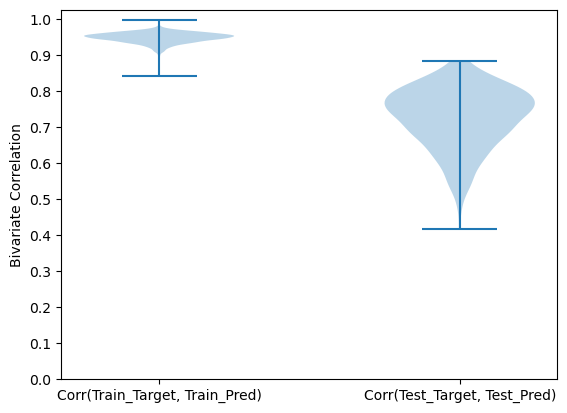

In [7]:
plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Pred)', 'Corr(Test_Target, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()


In [8]:
# Corr(train_preds, train_preds)
corr = np.corrcoef(train_pred)
traintrain_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_preds, test_preds)
corr = np.corrcoef(test_pred)
testtest_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

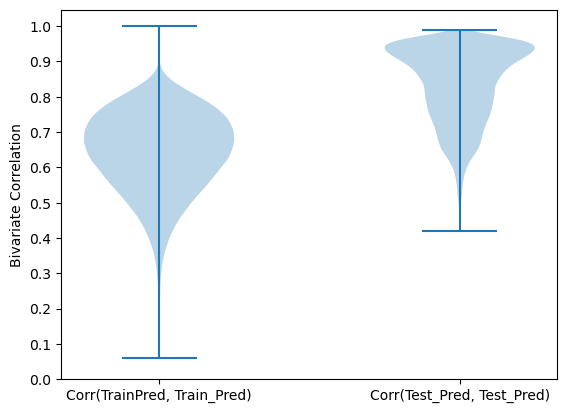

In [9]:
plt.violinplot([traintrain_pred_corrs, testtest_pred_corrs])
plt.xticks([1, 2], ['Corr(TrainPred, Train_Pred)', 'Corr(Test_Pred, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

In [10]:
# Corr(train_Target, train_grountruth)
corr = np.corrcoef(train_Target)
traintrain_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_Target, test_Target)
corr = np.corrcoef(test_Target)
testtest_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

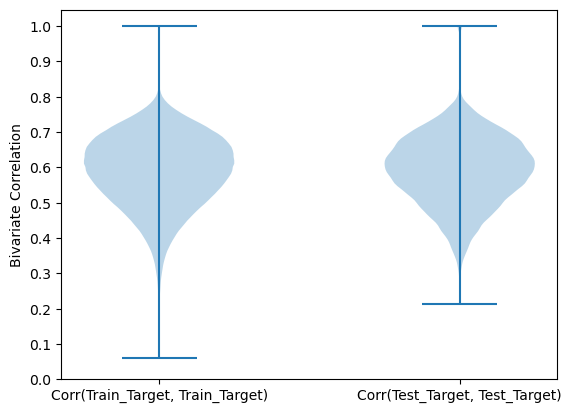

In [11]:
plt.violinplot([traintrain_Target_corrs, testtest_Target_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Target)', 'Corr(Test_Target, Test_Target)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

Correlation: 0.7587508274596867


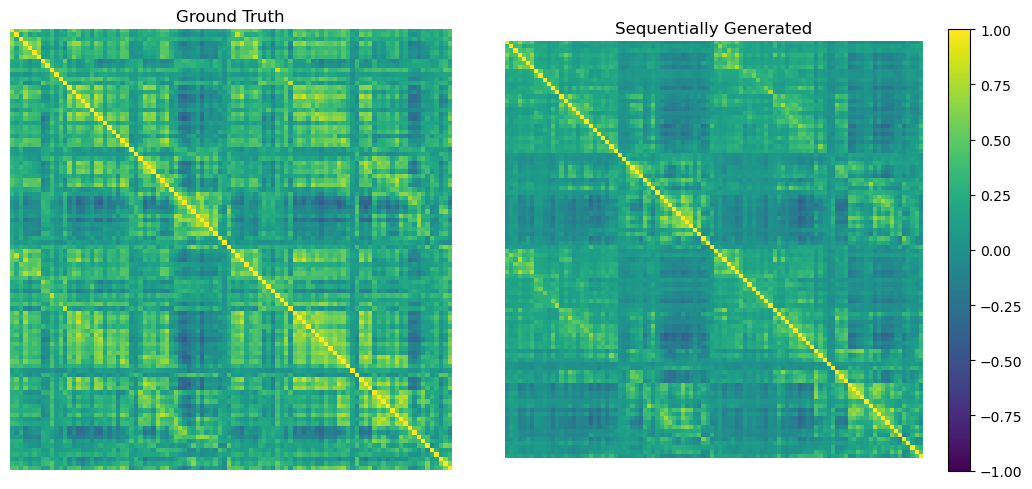

In [47]:
# TEST
show_subj_hemi(test_Target, test_pred, 4)

Correlation: 0.9640696424088766


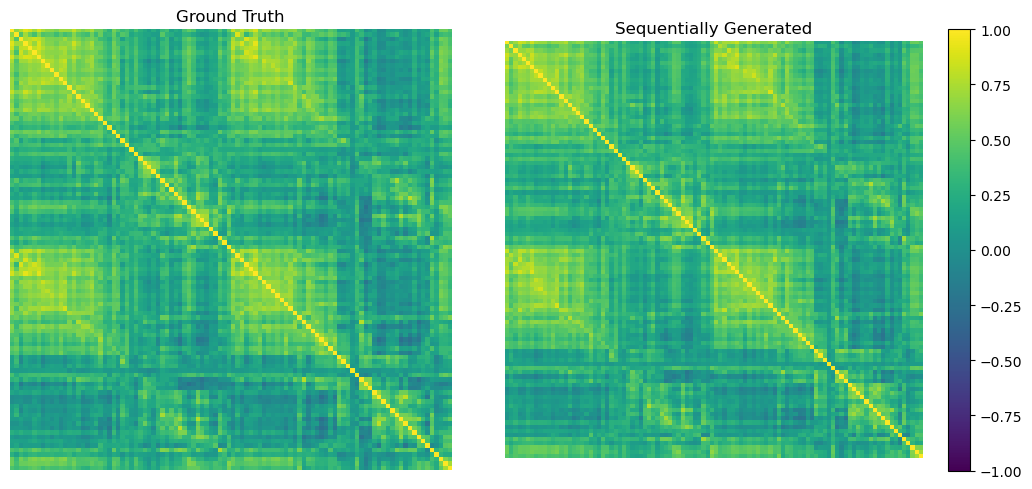

In [20]:
# TRAIN
show_subj_hemi(train_Target, train_pred, 900)


# Graph Transformer

Number Parameters: 341,948,472


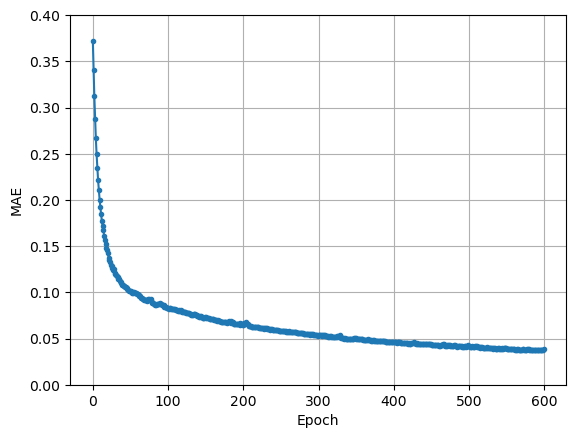

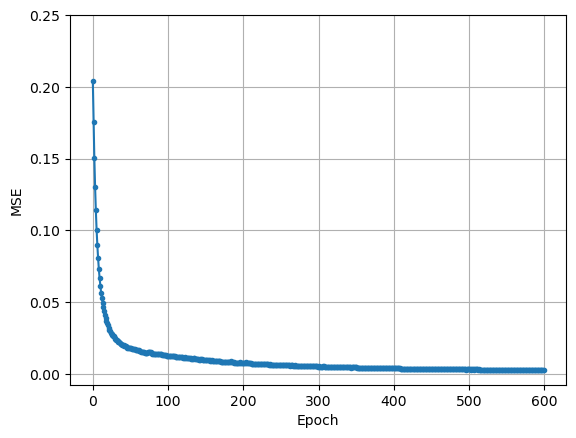

In [21]:
MAEs = [
    0.3722003996372223,
    0.3407289385795593,
    0.31209632754325867,
    0.2878988981246948,
    0.2668573558330536,
    0.24936437606811523,
    0.2346728891134262,
    0.22130237519741058,
    0.21031756699085236,
    0.20043042302131653,
    0.19195519387722015,
    0.18435660004615784,
    0.17740477621555328,
    0.17167943716049194,
    0.1676185429096222,
    0.16089412569999695,
    0.15635426342487335,
    0.15177126228809357,
    0.1483120322227478,
    0.14529037475585938,
    0.14245358109474182,
    0.13744817674160004,
    0.13492406904697418,
    0.1325366199016571,
    0.12990164756774902,
    0.12824039161205292,
    0.12629850208759308,
    0.12383910268545151,
    0.12485118210315704,
    0.12094379961490631,
    0.11955717951059341,
    0.11845184117555618,
    0.11803151667118073,
    0.11695035547018051,
    0.11473177373409271,
    0.1138773262500763,
    0.11245967447757721,
    0.11098744720220566,
    0.11050555109977722,
    0.10823182761669159,
    0.10811225324869156,
    0.10701505839824677,
    0.10723117738962173,
    0.10566039383411407,
    0.10586899518966675,
    0.10436628758907318,
    0.10318203270435333,
    0.10268688201904297,
    0.10169176012277603,
    0.10157746821641922,
    0.10180667787790298,
    0.1013704314827919,
    0.0994110107421875,
    0.10006162524223328,
    0.09955500066280365,
    0.0999893993139267,
    0.09882453083992004,
    0.09931053221225739,
    0.0991339161992073,
    0.0985923632979393,
    0.09831580519676208,
    0.09735177457332611,
    0.09563890099525452,
    0.09550338238477707,
    0.0943036675453186,
    0.09357502311468124,
    0.09251589328050613,
    0.0923108458518982,
    0.09198474884033203,
    0.09141150116920471,
    0.09144937247037888,
    0.09152323752641678,
    0.09082657843828201,
    0.09263496100902557,
    0.09237181395292282,
    0.09188854694366455,
    0.09222418069839478,
    0.09321857988834381,
    0.08946149796247482,
    0.08827035874128342,
    0.08801573514938354,
    0.08737808465957642,
    0.08667205274105072,
    0.08690565079450607,
    0.08631324768066406,
    0.08768109232187271,
    0.08689435571432114,
    0.08728747814893723,
    0.08747930824756622,
    0.08812976628541946,
    0.08695121854543686,
    0.08689256012439728,
    0.08624925464391708,
    0.08660951256752014,
    0.08601421862840652,
    0.08443796634674072,
    0.08375424891710281,
    0.08417170494794846,
    0.08350513130426407,
    0.08282054960727692,
    0.08267118781805038,
    0.08240968734025955,
    0.08259016275405884,
    0.08253289014101028,
    0.08209941536188126,
    0.08163422346115112,
    0.08214783668518066,
    0.08175083249807358,
    0.08144153654575348,
    0.0821511298418045,
    0.08125653117895126,
    0.08038253337144852,
    0.08067796379327774,
    0.08018098026514053,
    0.08041264116764069,
    0.07953763008117676,
    0.07987106591463089,
    0.08075249195098877,
    0.0799499973654747,
    0.07918097823858261,
    0.07832556217908859,
    0.07854827493429184,
    0.07820847630500793,
    0.07817815244197845,
    0.0779101550579071,
    0.07741972804069519,
    0.07710480690002441,
    0.07788297533988953,
    0.07721982896327972,
    0.07686450332403183,
    0.07593948394060135,
    0.07672262191772461,
    0.07563765347003937,
    0.0758819431066513,
    0.07701558619737625,
    0.07705720514059067,
    0.07666676491498947,
    0.07545947283506393,
    0.07520964741706848,
    0.07400643080472946,
    0.07385046035051346,
    0.07316024601459503,
    0.07332000881433487,
    0.07433591783046722,
    0.07395307719707489,
    0.07373432070016861,
    0.07255661487579346,
    0.07210545241832733,
    0.07209009677171707,
    0.07317890226840973,
    0.07341840118169785,
    0.07222995162010193,
    0.07242811471223831,
    0.07195167243480682,
    0.07172118872404099,
    0.07157242298126221,
    0.07098924368619919,
    0.0713842362165451,
    0.07160171121358871,
    0.07107984274625778,
    0.0707736536860466,
    0.0702613964676857,
    0.07053493708372116,
    0.06996225565671921,
    0.06979431211948395,
    0.06945587694644928,
    0.0695427656173706,
    0.06895028799772263,
    0.06862828135490417,
    0.06866954267024994,
    0.06840275973081589,
    0.06799687445163727,
    0.06833406537771225,
    0.0683535560965538,
    0.06820845603942871,
    0.06827886402606964,
    0.06764691323041916,
    0.06758467108011246,
    0.06726342439651489,
    0.06789560616016388,
    0.06824617087841034,
    0.06854169815778732,
    0.06834554672241211,
    0.06914161145687103,
    0.06721945852041245,
    0.0674179196357727,
    0.06763038039207458,
    0.06592916697263718,
    0.0657293051481247,
    0.06598569452762604,
    0.06568308174610138,
    0.06547074019908905,
    0.06615541875362396,
    0.06603630632162094,
    0.06525111943483353,
    0.06482364982366562,
    0.066311314702034,
    0.06591663509607315,
    0.0652976930141449,
    0.06491737812757492,
    0.06476090103387833,
    0.06627102941274643,
    0.06609947979450226,
    0.06783803552389145,
    0.06638480722904205,
    0.06556631624698639,
    0.06557075679302216,
    0.0640387013554573,
    0.0639479011297226,
    0.06329680979251862,
    0.06322123110294342,
    0.06265564262866974,
    0.0626644715666771,
    0.06294526904821396,
    0.06258398294448853,
    0.06279348582029343,
    0.062361326068639755,
    0.06210826337337494,
    0.06224123015999794,
    0.06197051331400871,
    0.06217958778142929,
    0.06147848814725876,
    0.0614873543381691,
    0.06144754961133003,
    0.06145812198519707,
    0.061704158782958984,
    0.061462774872779846,
    0.06034155189990997,
    0.061405159533023834,
    0.06178443133831024,
    0.06095900014042854,
    0.0604480542242527,
    0.06132233887910843,
    0.06055745109915733,
    0.06005198135972023,
    0.05970069020986557,
    0.06021721661090851,
    0.05986998975276947,
    0.059844549745321274,
    0.059651218354701996,
    0.05913369730114937,
    0.0592380128800869,
    0.05907003954052925,
    0.05925033614039421,
    0.058969222009181976,
    0.05942924693226814,
    0.05907665193080902,
    0.05863470584154129,
    0.05820814520120621,
    0.05832845717668533,
    0.05814465880393982,
    0.058492910116910934,
    0.05827459692955017,
    0.05835651233792305,
    0.05814285948872566,
    0.05772106349468231,
    0.05755580589175224,
    0.05784492567181587,
    0.05732733756303787,
    0.057498205453157425,
    0.057512808591127396,
    0.05767833814024925,
    0.05686526745557785,
    0.05702558159828186,
    0.05711979418992996,
    0.057337984442710876,
    0.05654187127947807,
    0.05657234415411949,
    0.05712608993053436,
    0.05683152377605438,
    0.056657399982213974,
    0.05635885149240494,
    0.05642478168010712,
    0.05583915114402771,
    0.056183893233537674,
    0.055835917592048645,
    0.05624301731586456,
    0.05557319149374962,
    0.056364528834819794,
    0.055678438395261765,
    0.054808713495731354,
    0.05529472231864929,
    0.054734308272600174,
    0.05495337024331093,
    0.0551658570766449,
    0.054667986929416656,
    0.05450453609228134,
    0.05441057309508324,
    0.054287537932395935,
    0.05482960864901543,
    0.054691508412361145,
    0.05489158630371094,
    0.0549476221203804,
    0.05391677841544151,
    0.05369985103607178,
    0.05388655513525009,
    0.05358182638883591,
    0.05350204184651375,
    0.05364396050572395,
    0.05311373248696327,
    0.0534239336848259,
    0.05341852456331253,
    0.053391847759485245,
    0.05339476838707924,
    0.05370534583926201,
    0.053124602884054184,
    0.05347512662410736,
    0.05360070616006851,
    0.053305841982364655,
    0.05306621268391609,
    0.05252751708030701,
    0.05274926871061325,
    0.05204220116138458,
    0.05236359313130379,
    0.052060630172491074,
    0.05224158242344856,
    0.05232313275337219,
    0.05153842270374298,
    0.05187578871846199,
    0.051341183483600616,
    0.05149289220571518,
    0.051344022154808044,
    0.051709920167922974,
    0.051724813878536224,
    0.051388923078775406,
    0.05242201313376427,
    0.052332229912281036,
    0.051615092903375626,
    0.05329445004463196,
    0.051603447645902634,
    0.05092015117406845,
    0.05017203837633133,
    0.05079150199890137,
    0.050211455672979355,
    0.04997187480330467,
    0.05010490119457245,
    0.04992305114865303,
    0.0499323345720768,
    0.04986955597996712,
    0.04990030452609062,
    0.0496225580573082,
    0.049948662519454956,
    0.04983469843864441,
    0.0498075969517231,
    0.050019871443510056,
    0.049632828682661057,
    0.049693670123815536,
    0.05024256184697151,
    0.050896864384412766,
    0.05035219341516495,
    0.04973389953374863,
    0.04961264505982399,
    0.04930849000811577,
    0.04950917139649391,
    0.04904623702168465,
    0.04931443929672241,
    0.049763273447752,
    0.04910366237163544,
    0.04898897930979729,
    0.04888276383280754,
    0.04842222109436989,
    0.048335909843444824,
    0.048235539346933365,
    0.04866081476211548,
    0.04881539195775986,
    0.048598721623420715,
    0.048994019627571106,
    0.0484122633934021,
    0.04847666248679161,
    0.04807047173380852,
    0.0476066879928112,
    0.047673299908638,
    0.04814515262842178,
    0.04759659618139267,
    0.048065319657325745,
    0.047470249235630035,
    0.047280263155698776,
    0.04726220667362213,
    0.04774554446339607,
    0.0477653332054615,
    0.04759250953793526,
    0.04734722152352333,
    0.04713887721300125,
    0.04691930487751961,
    0.04679638519883156,
    0.047363340854644775,
    0.04698697850108147,
    0.04725722223520279,
    0.04746314883232117,
    0.04671289399266243,
    0.04606121778488159,
    0.046763088554143906,
    0.0464443676173687,
    0.04668383300304413,
    0.046343911439180374,
    0.04658874496817589,
    0.0460103377699852,
    0.045966845005750656,
    0.04619225859642029,
    0.04621059447526932,
    0.04619107022881508,
    0.046032410115003586,
    0.045933157205581665,
    0.04573853686451912,
    0.045523226261138916,
    0.045803774148225784,
    0.04604317992925644,
    0.046263400465250015,
    0.04581709951162338,
    0.04528294503688812,
    0.04515264555811882,
    0.04523850604891777,
    0.04513194411993027,
    0.04531776160001755,
    0.04532203823328018,
    0.045252036303281784,
    0.04504697397351265,
    0.045261021703481674,
    0.04478679224848747,
    0.04456966370344162,
    0.044770319014787674,
    0.04451131448149681,
    0.04439152404665947,
    0.044882237911224365,
    0.04524361714720726,
    0.04525677114725113,
    0.04517815262079239,
    0.04571276530623436,
    0.04494965821504593,
    0.04459693282842636,
    0.04551435261964798,
    0.04433128610253334,
    0.043797075748443604,
    0.04382242634892464,
    0.043947383761405945,
    0.04431646317243576,
    0.043985527008771896,
    0.04416520893573761,
    0.044189393520355225,
    0.044050294905900955,
    0.0437760204076767,
    0.04405529052019119,
    0.04394497349858284,
    0.044134557247161865,
    0.04382122680544853,
    0.04403596371412277,
    0.04374998062849045,
    0.04410940408706665,
    0.04427750036120415,
    0.04381037503480911,
    0.04326328635215759,
    0.04303188621997833,
    0.04303093999624252,
    0.043358366936445236,
    0.04311540722846985,
    0.04299774393439293,
    0.042973846197128296,
    0.0427880734205246,
    0.04296742007136345,
    0.04247483238577843,
    0.04236092045903206,
    0.042172059416770935,
    0.04249155521392822,
    0.042638588696718216,
    0.0427665151655674,
    0.04396261274814606,
    0.04376259446144104,
    0.04261309653520584,
    0.0421939380466938,
    0.04242558404803276,
    0.04221578687429428,
    0.042685288935899734,
    0.043233372271060944,
    0.042682748287916183,
    0.042520903050899506,
    0.04208979383111,
    0.0417853482067585,
    0.04166160523891449,
    0.04157363623380661,
    0.04182659089565277,
    0.042519137263298035,
    0.04276011884212494,
    0.04177938401699066,
    0.0414092019200325,
    0.04128817841410637,
    0.0414196252822876,
    0.041992757469415665,
    0.04172814264893532,
    0.04146547615528107,
    0.04177318140864372,
    0.04177304357290268,
    0.041355717927217484,
    0.0411972776055336,
    0.04130767658352852,
    0.04147803410887718,
    0.04161157086491585,
    0.04121476784348488,
    0.04148264601826668,
    0.04247482493519783,
    0.04230792820453644,
    0.041463859379291534,
    0.04118769243359566,
    0.04102583974599838,
    0.04112985357642174,
    0.041673317551612854,
    0.04118235409259796,
    0.04089987650513649,
    0.0410320870578289,
    0.04150642454624176,
    0.04153654724359512,
    0.04119186848402023,
    0.04176367074251175,
    0.04092532396316528,
    0.04127988591790199,
    0.03988470882177353,
    0.040332306176424026,
    0.040453098714351654,
    0.040599118918180466,
    0.040147680789232254,
    0.04012112319469452,
    0.0397169291973114,
    0.039567843079566956,
    0.03974656015634537,
    0.040304332971572876,
    0.039742857217788696,
    0.039713699370622635,
    0.039334069937467575,
    0.03940804675221443,
    0.03953368961811066,
    0.03963100165128708,
    0.039486803114414215,
    0.03916160762310028,
    0.039502937346696854,
    0.03956156596541405,
    0.03954829275608063,
    0.03884602338075638,
    0.03900071606040001,
    0.03890656679868698,
    0.039532847702503204,
    0.03935837745666504,
    0.03906700015068054,
    0.03892716392874718,
    0.038944512605667114,
    0.03920050337910652,
    0.03939465805888176,
    0.03904026001691818,
    0.03951471671462059,
    0.039378657937049866,
    0.04005999118089676,
    0.03966248035430908,
    0.03899800404906273,
    0.03906233608722687,
    0.03862874582409859,
    0.03845750167965889,
    0.03855350241065025,
    0.03910540044307709,
    0.03870296850800514,
    0.03884625807404518,
    0.03900645300745964,
    0.03902802616357803,
    0.03843894228339195,
    0.037994176149368286,
    0.03796501085162163,
    0.03809458017349243,
    0.03838649019598961,
    0.03865121677517891,
    0.03808226063847542,
    0.037711016833782196,
    0.03780820965766907,
    0.0379476472735405,
    0.03811654448509216,
    0.03872079402208328,
    0.038710400462150574,
    0.038037486374378204,
    0.037436503916978836,
    0.037693653255701065,
    0.037423405796289444,
    0.0382654033601284,
    0.038643307983875275,
    0.03822508081793785,
    0.03787118196487427,
    0.03793671354651451,
    0.03771539777517319,
    0.037403546273708344,
    0.037579335272312164,
    0.03782236576080322,
    0.03792431950569153,
    0.037789832800626755,
    0.037675585597753525,
    0.03738467022776604,
    0.03741059824824333,
    0.03743415325880051,
    0.037567388266325,
    0.037133872509002686,
    0.03747420012950897,
    0.03711429610848427,
    0.037574876099824905,
    0.03781579062342644,
    0.03760357201099396,
    0.038161955773830414,
]
MSEs = [
    0.20375941693782806,
    0.1754062920808792,
    0.15055377781391144,
    0.13051268458366394,
    0.11398103088140488,
    0.10052322596311569,
    0.08968192338943481,
    0.08054310828447342,
    0.07297065854072571,
    0.0665593296289444,
    0.06129202991724014,
    0.05657242238521576,
    0.05269530415534973,
    0.04930194839835167,
    0.04679638892412186,
    0.043593425303697586,
    0.04116386920213699,
    0.03886310011148453,
    0.037070129066705704,
    0.03545357286930084,
    0.034144505858421326,
    0.03220350667834282,
    0.030854826793074608,
    0.029738225042819977,
    0.028687380254268646,
    0.027830298990011215,
    0.027037303894758224,
    0.02607733942568302,
    0.026141773909330368,
    0.02497713267803192,
    0.024243686348199844,
    0.023789720609784126,
    0.02345450408756733,
    0.022983493283391,
    0.022255126386880875,
    0.021837741136550903,
    0.02138703316450119,
    0.0209345743060112,
    0.02066672220826149,
    0.020143216475844383,
    0.019929535686969757,
    0.01971009373664856,
    0.019589850679039955,
    0.019182641059160233,
    0.019113974645733833,
    0.018709279596805573,
    0.01829102262854576,
    0.018135055899620056,
    0.0178771261125803,
    0.017798615619540215,
    0.017813004553318024,
    0.017648978158831596,
    0.01720314659178257,
    0.017306899651885033,
    0.017123732715845108,
    0.017328327521681786,
    0.016977977007627487,
    0.016883820295333862,
    0.016850946471095085,
    0.016676882281899452,
    0.016538351774215698,
    0.016242286190390587,
    0.01592659391462803,
    0.01575792022049427,
    0.015487747266888618,
    0.015286282636225224,
    0.015106410719454288,
    0.014958453364670277,
    0.014834386296570301,
    0.01479037944227457,
    0.014724664390087128,
    0.014748054556548595,
    0.014666668139398098,
    0.01503175962716341,
    0.014997093006968498,
    0.014868287369608879,
    0.014898370020091534,
    0.014939609915018082,
    0.014134050346910954,
    0.013881482183933258,
    0.01378687098622322,
    0.013607295230031013,
    0.013533996418118477,
    0.013487506657838821,
    0.01354212872684002,
    0.013694060035049915,
    0.013569495640695095,
    0.013577936217188835,
    0.01378085557371378,
    0.013978647068142891,
    0.013614898547530174,
    0.013604576699435711,
    0.013311214745044708,
    0.013326060958206654,
    0.013199849054217339,
    0.012860960327088833,
    0.012783750891685486,
    0.012837306596338749,
    0.012613809667527676,
    0.012532273307442665,
    0.012443126179277897,
    0.012392586097121239,
    0.012405009008944035,
    0.012391419149935246,
    0.012322262860834599,
    0.012101603671908379,
    0.012254809029400349,
    0.012087774462997913,
    0.012038174085319042,
    0.012082215398550034,
    0.011951987631618977,
    0.011809220537543297,
    0.01172687392681837,
    0.011800086125731468,
    0.01170329935848713,
    0.011548544280230999,
    0.011616997420787811,
    0.011756709776818752,
    0.011561146937310696,
    0.011357155628502369,
    0.011255165562033653,
    0.011239549145102501,
    0.011218779720366001,
    0.011464765295386314,
    0.011137343011796474,
    0.011103719472885132,
    0.010929052717983723,
    0.011015539057552814,
    0.01091071031987667,
    0.01079722959548235,
    0.010636948049068451,
    0.010803312994539738,
    0.01052542682737112,
    0.010488137602806091,
    0.01068169716745615,
    0.010690566152334213,
    0.010559962131083012,
    0.010348576121032238,
    0.010278233326971531,
    0.010078711435198784,
    0.010036017745733261,
    0.009884001687169075,
    0.009859257377684116,
    0.009970027953386307,
    0.009988940320909023,
    0.009996685199439526,
    0.00977686233818531,
    0.009562524035573006,
    0.009553374722599983,
    0.009739132598042488,
    0.009735243394970894,
    0.009575926698744297,
    0.009569074027240276,
    0.009422575123608112,
    0.009403225034475327,
    0.009295526891946793,
    0.009188620373606682,
    0.009190414100885391,
    0.009255355224013329,
    0.009145094081759453,
    0.00906801875680685,
    0.009073596447706223,
    0.009092657826840878,
    0.008967016823589802,
    0.008857248350977898,
    0.008801382035017014,
    0.00872316025197506,
    0.008662045933306217,
    0.00863390602171421,
    0.008554060012102127,
    0.008515202440321445,
    0.008419233374297619,
    0.008498032577335835,
    0.008464016951620579,
    0.008404163643717766,
    0.00843766424804926,
    0.00832150038331747,
    0.008340049535036087,
    0.008248234167695045,
    0.008312431164085865,
    0.00841315183788538,
    0.008510952815413475,
    0.008464383892714977,
    0.008578312583267689,
    0.008130877278745174,
    0.008231175132095814,
    0.0081945164129138,
    0.007901331409811974,
    0.007832112722098827,
    0.007801696192473173,
    0.007768671959638596,
    0.0077271489426493645,
    0.007817988283932209,
    0.007847803644835949,
    0.007688615005463362,
    0.007623173762112856,
    0.007957996800541878,
    0.007844728417694569,
    0.00780071597546339,
    0.007596689276397228,
    0.007557220291346312,
    0.007805234286934137,
    0.00775506254285574,
    0.008094415068626404,
    0.007776103913784027,
    0.00759574631229043,
    0.007636045105755329,
    0.00732492795214057,
    0.007298519369214773,
    0.007202176842838526,
    0.0071951779536902905,
    0.0071069044061005116,
    0.00705660181120038,
    0.007111146114766598,
    0.006993418093770742,
    0.007034415379166603,
    0.006958269514143467,
    0.006935750599950552,
    0.006920352578163147,
    0.006886165589094162,
    0.0068616014905273914,
    0.00676120538264513,
    0.006743875332176685,
    0.006746257189661264,
    0.006700368598103523,
    0.0067464751191437244,
    0.006716561038047075,
    0.00654044933617115,
    0.006767987739294767,
    0.006804723758250475,
    0.006623611785471439,
    0.00652835238724947,
    0.006634079851210117,
    0.006503012031316757,
    0.006411388516426086,
    0.006403864827007055,
    0.006463780999183655,
    0.006393092218786478,
    0.006334714125841856,
    0.006290979217737913,
    0.00623893178999424,
    0.006305153016000986,
    0.006243955343961716,
    0.006259181536734104,
    0.00618693558499217,
    0.00624398048967123,
    0.006249549798667431,
    0.0061622364446520805,
    0.006096474826335907,
    0.006097197998315096,
    0.0060343267396092415,
    0.006036486476659775,
    0.006060842424631119,
    0.006032359786331654,
    0.006019292864948511,
    0.005952591076493263,
    0.005911055486649275,
    0.005991770885884762,
    0.005854940507560968,
    0.005949915386736393,
    0.0058717746287584305,
    0.005878325551748276,
    0.00576256075873971,
    0.005777284037321806,
    0.005824295338243246,
    0.005797360558062792,
    0.005679106339812279,
    0.005691147409379482,
    0.005795299541205168,
    0.005731872748583555,
    0.005690169520676136,
    0.005708248354494572,
    0.005641724448651075,
    0.005569972563534975,
    0.00560841616243124,
    0.00554314348846674,
    0.005632353015244007,
    0.005460223648697138,
    0.005582643207162619,
    0.005468006711453199,
    0.005352729000151157,
    0.00547372829169035,
    0.005317837465554476,
    0.0053308457136154175,
    0.005382005590945482,
    0.00532206054776907,
    0.005267918575555086,
    0.005279851611703634,
    0.005262340418994427,
    0.005311578046530485,
    0.005330675281584263,
    0.005321567878127098,
    0.0054054842330515385,
    0.005165702663362026,
    0.005126399453729391,
    0.005127293989062309,
    0.005091859493404627,
    0.005106510128825903,
    0.005094622261822224,
    0.00501441303640604,
    0.005073811858892441,
    0.005055978428572416,
    0.005060098133981228,
    0.005044189747422934,
    0.005053258966654539,
    0.004975844174623489,
    0.005123925860971212,
    0.005093160551041365,
    0.005065901670604944,
    0.005025933496654034,
    0.004984505474567413,
    0.004951165057718754,
    0.004845635034143925,
    0.004861517809331417,
    0.004843052010983229,
    0.0048318589106202126,
    0.004835912492126226,
    0.0047095841728150845,
    0.004785279277712107,
    0.00466692540794611,
    0.0046702176332473755,
    0.004700160585343838,
    0.004725073464214802,
    0.004737494047731161,
    0.004688863642513752,
    0.0049155582673847675,
    0.004829332232475281,
    0.004720801487565041,
    0.004946636036038399,
    0.004699194338172674,
    0.004617738071829081,
    0.00447628041729331,
    0.004542216192930937,
    0.004472315311431885,
    0.004450753331184387,
    0.004431750625371933,
    0.004434539936482906,
    0.004437543917447329,
    0.00442711403593421,
    0.004417015705257654,
    0.004388588946312666,
    0.004409284796565771,
    0.0044254460372030735,
    0.004365170374512672,
    0.004409860819578171,
    0.004395739175379276,
    0.004376649856567383,
    0.004507071804255247,
    0.00459746690467,
    0.004547216463834047,
    0.00438448041677475,
    0.004346293862909079,
    0.004315219819545746,
    0.0043221754021942616,
    0.0042676073499023914,
    0.004289017058908939,
    0.004350530914962292,
    0.004267371259629726,
    0.004251701757311821,
    0.004254002124071121,
    0.00417539244517684,
    0.004155260976403952,
    0.004129910375922918,
    0.004181605763733387,
    0.004192535299807787,
    0.004190582782030106,
    0.004237478133291006,
    0.0041426545940339565,
    0.004160820506513119,
    0.004101092461496592,
    0.00399723369628191,
    0.004030479583889246,
    0.0040801712311804295,
    0.00400656508281827,
    0.0040499488823115826,
    0.004018569830805063,
    0.003992797806859016,
    0.003971316386014223,
    0.004033475182950497,
    0.004038467071950436,
    0.0040168194100260735,
    0.003961277659982443,
    0.0039232694543898106,
    0.0038842002395540476,
    0.003858704585582018,
    0.003951860126107931,
    0.003911097068339586,
    0.003965766169130802,
    0.003953055012971163,
    0.003867694642394781,
    0.0037674661725759506,
    0.0038906491827219725,
    0.0038219373673200607,
    0.0038342627231031656,
    0.003786985296756029,
    0.0038554235361516476,
    0.0037431286182254553,
    0.003735860576853156,
    0.0037898491136729717,
    0.003802296705543995,
    0.0037692380137741566,
    0.003738109255209565,
    0.0037209682632237673,
    0.003698993707075715,
    0.0036847274750471115,
    0.0037320952396839857,
    0.0037726799491792917,
    0.0037624926771968603,
    0.003715692786499858,
    0.0036147315986454487,
    0.003599658841267228,
    0.003615225898101926,
    0.0036159204319119453,
    0.0036430361215025187,
    0.003648686921223998,
    0.003629150800406933,
    0.003596167778596282,
    0.003618396120145917,
    0.0035245725885033607,
    0.003533032489940524,
    0.0035505497362464666,
    0.0035051677841693163,
    0.0034959744662046432,
    0.0035405566450208426,
    0.0036123679019510746,
    0.003626686055213213,
    0.003576151095330715,
    0.003665872849524021,
    0.0035675037652254105,
    0.00349621893838048,
    0.0036227209493517876,
    0.0034673893824219704,
    0.00339661561883986,
    0.0034006433561444283,
    0.0034161233343183994,
    0.0034619427751749754,
    0.003432763274759054,
    0.0034416706766933203,
    0.0034837345592677593,
    0.0034138644114136696,
    0.003401367226615548,
    0.003436937928199768,
    0.003406374715268612,
    0.003432715777307749,
    0.0033966663759201765,
    0.0034107074607163668,
    0.0033909413032233715,
    0.0034244649577885866,
    0.0034315017983317375,
    0.0033623010385781527,
    0.003317346330732107,
    0.0032711264211684465,
    0.003276227507740259,
    0.0033159474842250347,
    0.003313642693683505,
    0.0032717352733016014,
    0.003275154624134302,
    0.003230947069823742,
    0.003250204725190997,
    0.0031999472994357347,
    0.00317422766238451,
    0.003159325337037444,
    0.003220544196665287,
    0.003209488233551383,
    0.0032305193599313498,
    0.0034059721510857344,
    0.0033791440073400736,
    0.003215816570445895,
    0.003161792643368244,
    0.003191258292645216,
    0.0031519278418272734,
    0.0032088663429021835,
    0.0032741865143179893,
    0.00323726749047637,
    0.0031769596971571445,
    0.003122996771708131,
    0.0030730513390153646,
    0.0030605432111769915,
    0.003064599586650729,
    0.0030827296432107687,
    0.003193061100319028,
    0.0032210219651460648,
    0.0030773705802857876,
    0.0030290400609374046,
    0.0030133191030472517,
    0.0030276787001639605,
    0.003104514442384243,
    0.0030712697189301252,
    0.0030464462470263243,
    0.003093470586463809,
    0.0030814791098237038,
    0.0030135323759168386,
    0.00299725029617548,
    0.0030132404062896967,
    0.0030284610111266375,
    0.0030265117529779673,
    0.0029726282227784395,
    0.003037458984181285,
    0.003131835488602519,
    0.0031201797537505627,
    0.003031957196071744,
    0.0029865761753171682,
    0.002961257006973028,
    0.0029843610245734453,
    0.003061650088056922,
    0.0029846704564988613,
    0.0029458303470164537,
    0.0029955958016216755,
    0.003052162006497383,
    0.003043675795197487,
    0.002976324176415801,
    0.003063756041228771,
    0.0029268856160342693,
    0.0030054026283323765,
    0.0028011819813400507,
    0.0028750544879585505,
    0.002874207915738225,
    0.0028939221519976854,
    0.0028488945681601763,
    0.002845203969627619,
    0.002777337795123458,
    0.0027634347788989544,
    0.002793695544824004,
    0.0028604413382709026,
    0.002801753580570221,
    0.002790086204186082,
    0.0027314412873238325,
    0.002743031131103635,
    0.002762807300314307,
    0.0027784265112131834,
    0.002734594978392124,
    0.0027040361892431974,
    0.002779545495286584,
    0.0027683258522301912,
    0.002750430954620242,
    0.0026649460196495056,
    0.0026831200812011957,
    0.0026893175672739744,
    0.00278094201348722,
    0.002770649502053857,
    0.002695798873901367,
    0.00267612561583519,
    0.0027002100832760334,
    0.002713528461754322,
    0.0027175932191312313,
    0.002683111233636737,
    0.002747798338532448,
    0.002729233121499419,
    0.002821945119649172,
    0.002785353222861886,
    0.0026824965607374907,
    0.002686858642846346,
    0.0026406608521938324,
    0.002611359814181924,
    0.002616153098642826,
    0.002676615258678794,
    0.0026301199104636908,
    0.0026657606940716505,
    0.0026690387167036533,
    0.0026778029277920723,
    0.0026103686541318893,
    0.002543521113693714,
    0.0025347371120005846,
    0.0025577140040695667,
    0.002600622596219182,
    0.0026196003891527653,
    0.002560306340456009,
    0.0025195088237524033,
    0.0025206024292856455,
    0.002541890135034919,
    0.002567216521129012,
    0.002619439270347357,
    0.0026233899407088757,
    0.0025429229717701674,
    0.0024795832578092813,
    0.002515686908736825,
    0.002473351778462529,
    0.0025687897577881813,
    0.002638885285705328,
    0.0025706368032842875,
    0.0025205325800925493,
    0.00254104845225811,
    0.0025069506373256445,
    0.002477947622537613,
    0.0024801588151603937,
    0.0025221952237188816,
    0.002520729787647724,
    0.002498831832781434,
    0.0024921034928411245,
    0.0024524573236703873,
    0.0024674134328961372,
    0.002469584345817566,
    0.002492099767550826,
    0.0024345358833670616,
    0.002470213221386075,
    0.0024308857973665,
    0.002489707199856639,
    0.0025126140099018812,
    0.0024837604723870754,
    0.002552789170295,
]

print("Number Parameters: 341,948,472")
plot_training_losses(MAEs, range=np.arange(0, 0.41, 0.05))
plot_training_losses(MSEs, loss="MSE", range=np.arange(0, 0.26, 0.05))

In [5]:
# load_data
test_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/GraphConvModel/test_ground_truth.npy")
test_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/GraphConvModel/test_pred.npy")

train_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/GraphConvModel/train_ground_truth.npy")
train_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/GraphConvModel/train_pred.npy")

Text(0.5, 1.0, 'Graph Transformer Prediction')

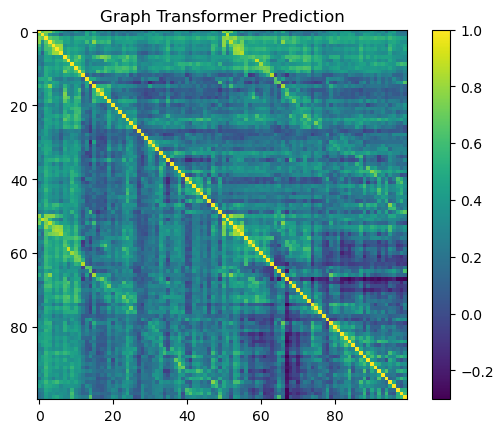

In [16]:
plt.imshow(train_pred[15, :, :])
plt.colorbar()
plt.title("Graph Transformer Prediction")

Text(0.5, 1.0, 'Ground Truth')

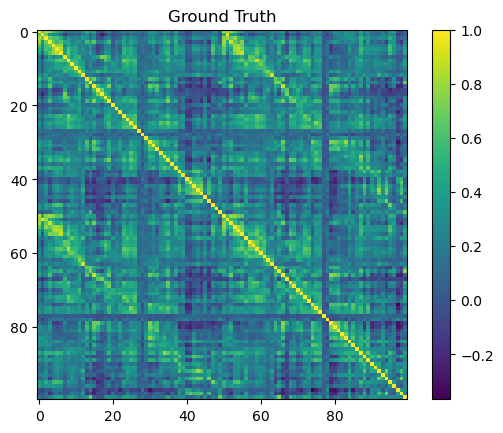

In [17]:
plt.imshow(train_Target[15, :, :])
plt.colorbar()
plt.title("Ground Truth")

# MassiveConv

Seems to be doing just as well as LargeConv


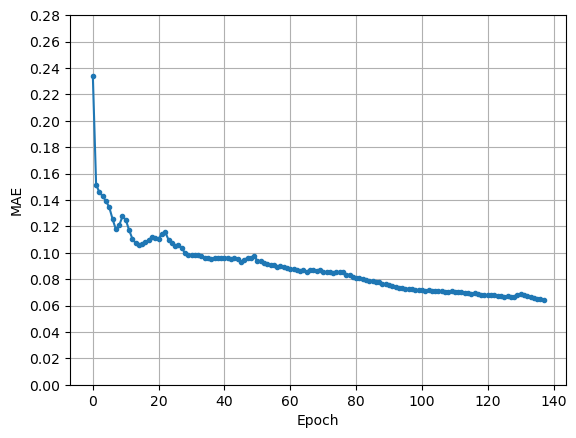

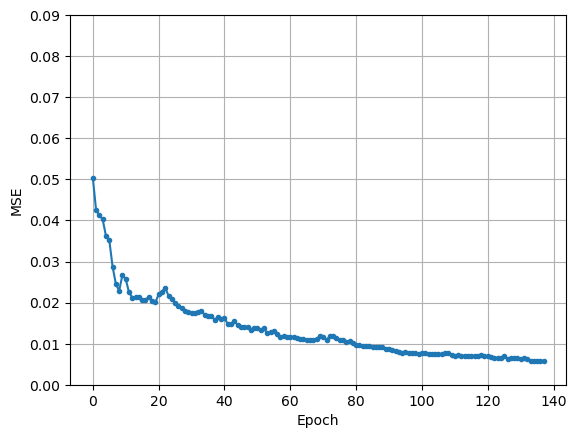

In [20]:
MAEs = [
    0.23416471,
    0.15161736,
    0.1456759,
    0.14290822,
    0.13909975,
    0.13436384,
    0.12549236,
    0.117699176,
    0.12067188,
    0.12744427,
    0.12504242,
    0.1173094,
    0.11067223,
    0.10728972,
    0.106224194,
    0.10664888,
    0.10811023,
    0.10940113,
    0.11220448,
    0.11102252,
    0.11073677,
    0.11454317,
    0.11557887,
    0.109828405,
    0.10764552,
    0.10521085,
    0.10576368,
    0.10369972,
    0.09965033,
    0.098553024,
    0.09809066,
    0.09864754,
    0.098268434,
    0.097152635,
    0.09587514,
    0.095720775,
    0.09545017,
    0.0956794,
    0.09626559,
    0.09625823,
    0.0963362,
    0.096209064,
    0.09494499,
    0.095807984,
    0.095439926,
    0.09285053,
    0.09444361,
    0.09630666,
    0.09592951,
    0.097730465,
    0.09367298,
    0.09365265,
    0.09186583,
    0.0914345,
    0.09059817,
    0.09100275,
    0.08917074,
    0.08957321,
    0.089018695,
    0.0881414,
    0.08766361,
    0.0875529,
    0.0869675,
    0.086318664,
    0.086876325,
    0.08570972,
    0.08713133,
    0.08685732,
    0.08599965,
    0.087243944,
    0.08509575,
    0.085160926,
    0.085244656,
    0.08464416,
    0.08503729,
    0.085052505,
    0.085042894,
    0.08345922,
    0.08319404,
    0.08153449,
    0.08117166,
    0.080930084,
    0.080187075,
    0.07962953,
    0.07869388,
    0.078580774,
    0.07818317,
    0.077503316,
    0.07662095,
    0.07613973,
    0.07589135,
    0.07469824,
    0.07396197,
    0.07331432,
    0.072901934,
    0.07272928,
    0.07256526,
    0.072283134,
    0.0719083,
    0.07169997,
    0.071398966,
    0.07124821,
    0.0715408,
    0.07127833,
    0.07076301,
    0.071046345,
    0.07075117,
    0.07033232,
    0.070489526,
    0.0708522,
    0.07042184,
    0.07047451,
    0.0705165,
    0.06949721,
    0.06918311,
    0.06909876,
    0.06917234,
    0.068506345,
    0.06783582,
    0.06774374,
    0.06775766,
    0.06777054,
    0.06761127,
    0.06708637,
    0.066958055,
    0.06682042,
    0.066840574,
    0.06671454,
    0.06683219,
    0.0682251,
    0.06890346,
    0.067973025,
    0.06728436,
    0.06633824,
    0.06573292,
    0.065018624,
    0.064665705,
    0.06441881,
]
MSEs = [
    0.05042571201920509,
    0.04243849590420723,
    0.041288960725069046,
    0.04023289307951927,
    0.03618393465876579,
    0.03524310886859894,
    0.028761962428689003,
    0.024558722972869873,
    0.022861871868371964,
    0.02672925405204296,
    0.025691689923405647,
    0.02248971536755562,
    0.021228739991784096,
    0.021330630406737328,
    0.02139977365732193,
    0.020569216459989548,
    0.020750539377331734,
    0.021310070529580116,
    0.02046223357319832,
    0.020059343427419662,
    0.02199893817305565,
    0.022634681314229965,
    0.023654403164982796,
    0.021630950272083282,
    0.020904602482914925,
    0.019901057705283165,
    0.01924002170562744,
    0.01861603558063507,
    0.017911529168486595,
    0.017604369670152664,
    0.017423920333385468,
    0.01755673624575138,
    0.017678705975413322,
    0.01805156096816063,
    0.017005082219839096,
    0.016790315508842468,
    0.01673378050327301,
    0.015861751511693,
    0.01642458140850067,
    0.016111651435494423,
    0.016257574781775475,
    0.014753070659935474,
    0.014751747250556946,
    0.015412088483572006,
    0.014590407721698284,
    0.014154664240777493,
    0.014093540608882904,
    0.014097404666244984,
    0.01335238292813301,
    0.013805023394525051,
    0.013770551420748234,
    0.013344568200409412,
    0.013707808218896389,
    0.012566490098834038,
    0.012905096635222435,
    0.013189930468797684,
    0.012439724057912827,
    0.011730247177183628,
    0.011762251146137714,
    0.011702844873070717,
    0.01172629464417696,
    0.011598512530326843,
    0.01142959389835596,
    0.011097469367086887,
    0.011235064826905727,
    0.010819937102496624,
    0.010782735422253609,
    0.010971689596772194,
    0.011145024560391903,
    0.011865748092532158,
    0.011586091481149197,
    0.010948557406663895,
    0.011777023784816265,
    0.011882671155035496,
    0.011303558945655823,
    0.010882441885769367,
    0.011011723428964615,
    0.010403315536677837,
    0.01061956025660038,
    0.010114449076354504,
    0.009703481569886208,
    0.009601606987416744,
    0.009523154236376286,
    0.009376478381454945,
    0.009311957284808159,
    0.009251394309103489,
    0.009073109365999699,
    0.009207900613546371,
    0.009136773645877838,
    0.008766906335949898,
    0.008592365309596062,
    0.008338241837918758,
    0.008102726191282272,
    0.007942922413349152,
    0.007809655740857124,
    0.007849687710404396,
    0.007775602862238884,
    0.007808379363268614,
    0.007745723705738783,
    0.007510261610150337,
    0.0076479120180010796,
    0.0076772915199398994,
    0.007458720356225967,
    0.00748512102290988,
    0.007380882743746042,
    0.007363796234130859,
    0.007420355454087257,
    0.007614699192345142,
    0.007776198443025351,
    0.007341369986534119,
    0.0070848166942596436,
    0.007160545326769352,
    0.007062830962240696,
    0.007050002925097942,
    0.006965558510273695,
    0.00704829441383481,
    0.007006694562733173,
    0.006873044651001692,
    0.007236078381538391,
    0.006908650044351816,
    0.006944497115910053,
    0.006727780215442181,
    0.006450933404266834,
    0.006550555117428303,
    0.006387754343450069,
    0.006916153244674206,
    0.006362707819789648,
    0.006520566996186972,
    0.0065411049872636795,
    0.006523663178086281,
    0.006343469489365816,
    0.0064953286200761795,
    0.006177891977131367,
    0.005884344223886728,
    0.005837943870574236,
    0.005803847685456276,
    0.005761368665844202,
    0.005714789964258671,
]

print("Seems to be doing just as well as LargeConv")
plot_training_losses(MAEs, range=np.arange(0, 0.29, 0.02))
plot_training_losses(MSEs, loss="MSE", range=np.arange(0, 0.1, 0.01))

# Permuted labels

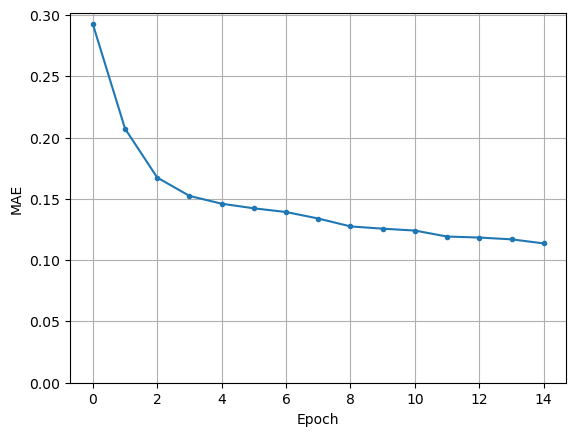

In [25]:
permuted_MAEs = [0.29256663, 0.20725083, 0.16735975, 0.15241235, 0.14602923, 0.14227794, 0.13924822, 0.13394593, 0.12752366, 0.12566021, 0.12413106, 0.11925285, 0.11843768, 0.1169662, 0.11364503]
plot_training_losses(permuted_MAEs, range=np.arange(0, 0.31, 0.05))


In [48]:
# load_data
test_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/permuted_train/test_ground_truth.npy")
test_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/permuted_train/test_pred.npy")

train_Target = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/permuted_train/train_ground_truth.npy")
train_pred = np.load("/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/LocalTransformerTests/_FyzTests/TrainOut/LargeConvModel/permuted_train/train_pred.npy")

Correlation: 0.67190825433214


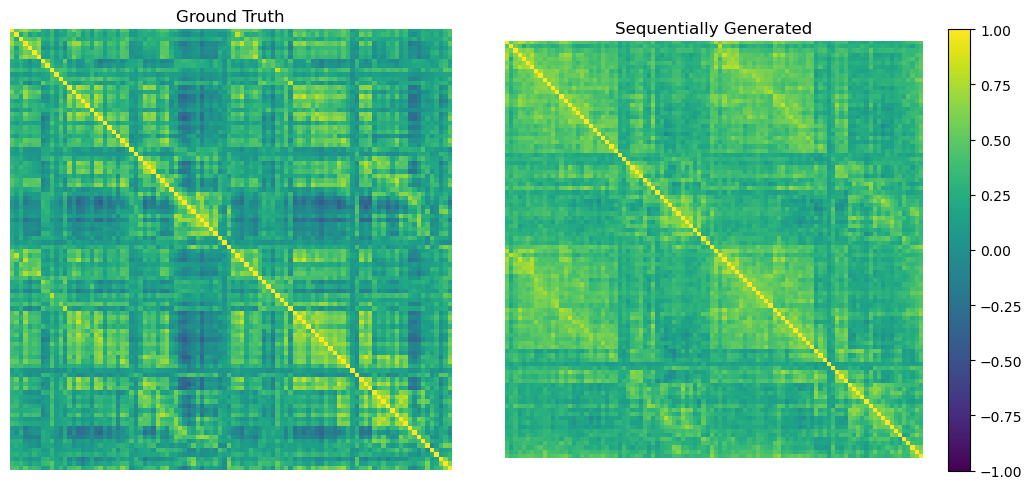

In [49]:
show_subj_hemi(test_Target, test_pred, 4)
## TEST SUBJ

Correlation: 0.7787618761624242


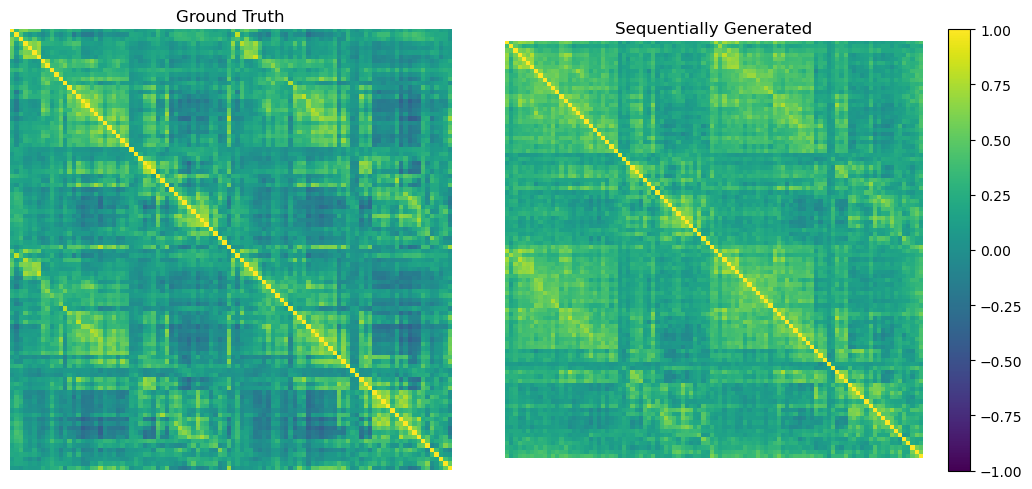

In [35]:
show_subj_hemi(train_Target, train_pred, 4)
# TRAIN SUBJ

In [33]:
# Corr(train_preds, train_preds)
corr = np.corrcoef(train_pred)
traintrain_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_preds, test_preds)
corr = np.corrcoef(test_pred)
testtest_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

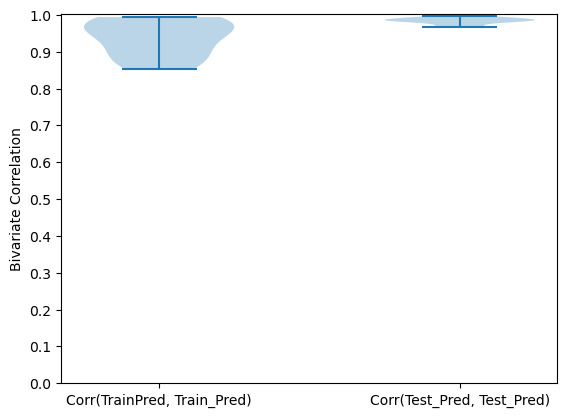

In [34]:
plt.violinplot([traintrain_pred_corrs, testtest_pred_corrs])
plt.xticks([1, 2], ['Corr(TrainPred, Train_Pred)', 'Corr(Test_Pred, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()